In [1]:
from sklearn import datasets
boston = datasets.load_boston()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

/Users/junwei1/opt/anaconda3/envs/mlfinlab/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

In [2]:
lr.fit(boston.data, boston.target)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1,
normalize=False)

LinearRegression(n_jobs=1, normalize=False)

In [4]:
from sklearn.model_selection import cross_val_predict
predictions_cv = cross_val_predict(lr, boston.data, boston.target,cv=10)

<AxesSubplot:>

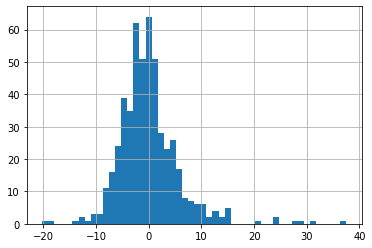

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#within Ipython
%matplotlib inline
pd.Series(boston.target - predictions_cv).hist(bins=50)

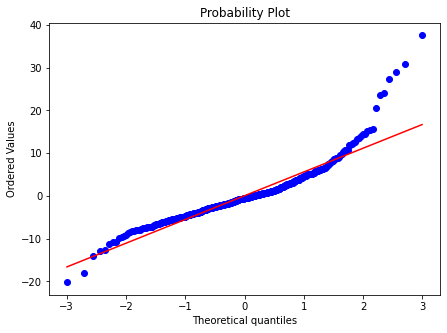

In [6]:
from scipy.stats import probplot
f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
tuple_out = probplot(boston.target - predictions_cv, plot=ax)

In [7]:
tuple_out[1] 

(5.5505000940620794, 0.03643470509169839, 0.9397036433372765)

In [9]:
def MSE(target, predictions):
                squared_deviation = np.power(target - predictions, 2)
                return np.mean(squared_deviation)
MSE(boston.target, predictions_cv)

34.539659539993245

In [10]:
def MAD(target, predictions):
                absolute_deviation = np.abs(target - predictions)
                return np.mean(absolute_deviation)
MAD(boston.target, predictions_cv)


3.9973058525932488

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print( 'MAE: ', mean_absolute_error(boston.target, predictions_cv))
print ('MSE: ', mean_squared_error(boston.target, predictions_cv))


MAE:  3.9973058525932488
MSE:  34.539659539993245


In [12]:
n_bootstraps = 1000
len_boston = len(boston.target)
subsample_size = np.int(0.5*len_boston)
subsample = lambda: np.random.choice(np.arange(0,len_boston),size=subsample_size)
coefs = np.ones(n_bootstraps) #pre-allocate the space for the coefs
for i in range(n_bootstraps):
   subsample_idx = subsample()
   subsample_X = boston.data[subsample_idx]
   subsample_y = boston.target[subsample_idx]
   lr.fit(subsample_X, subsample_y)
   coefs[i] = lr.coef_[0]

Text(0.5, 1.0, 'Histogram of the lr.coef_[0].')

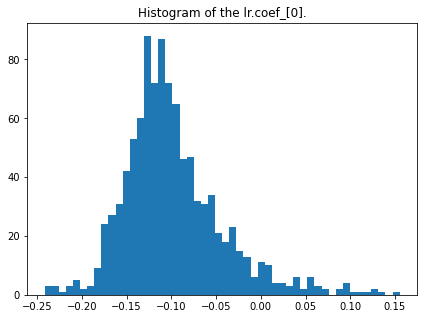

In [13]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
ax.hist(coefs, bins=50)
ax.set_title("Histogram of the lr.coef_[0].")

In [14]:
np.percentile(coefs, [2.5, 97.5])

array([-0.18036251,  0.04464963])